In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
def process_csv(path, label):
    df = pd.read_csv(path)
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df = df.sort_values('Timestamp').reset_index(drop=True)

    # Take middle 150 runs
    middle_start = (len(df) - 150) // 2
    middle_df = df.iloc[middle_start:middle_start + 150].copy()

    # Reset run number to 1 through 150
    middle_df['Run #'] = range(1, 151)

    middle_df['Source'] = label
    return middle_df[['Run #', 'Confidence', 'Source']]

In [34]:
csv1 = process_csv("results/recognition_log_train_alex_correct_camera.csv", "Good Conditions")
csv2 = process_csv("results/recognition_log_train_alex_wrong_camera.csv", "Bad Conditions")
csv3 = process_csv("results/recognition_log_train_alex_hat_on.csv", "Ok Conditions (Hat On)")

# Combine for plotting
combined_df = pd.concat([csv1, csv2, csv3])

In [35]:
combined_df

,Run #,Confidence,Source
100,1,46.34,Good Conditions
101,2,46.37,Good Conditions
102,3,45.77,Good Conditions
103,4,52.90,Good Conditions
104,5,50.05,Good Conditions
...,...,...,...
226,146,48.12,Ok Conditions (Hat On)
227,147,49.70,Ok Conditions (Hat On)
228,148,47.56,Ok Conditions (Hat On)
229,149,47.26,Ok Conditions (Hat On)


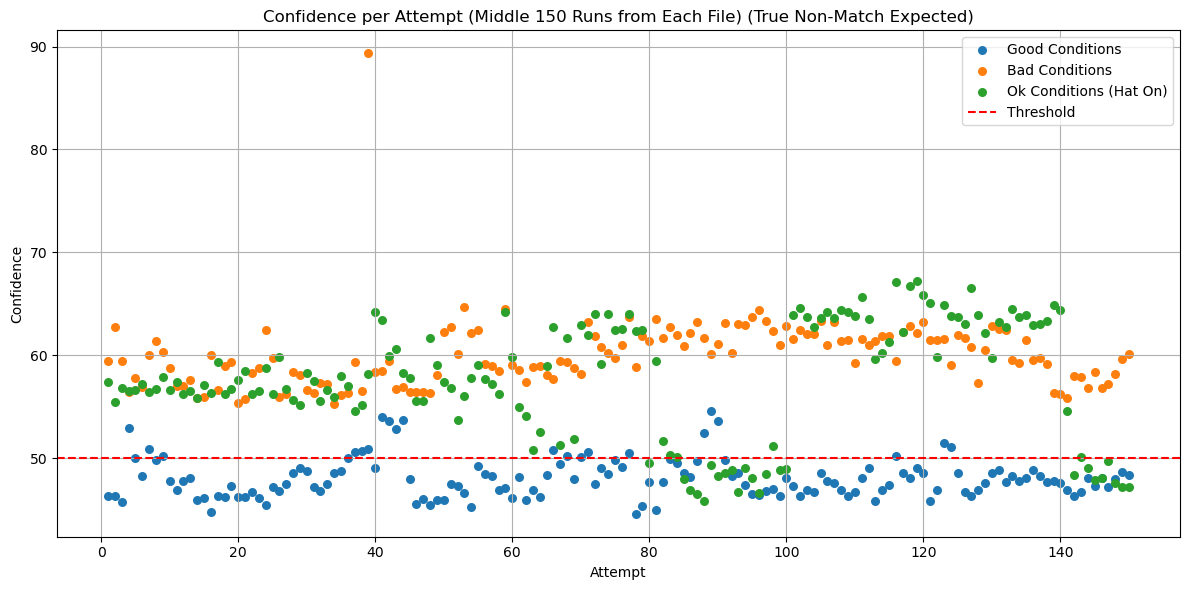

In [36]:
# Plot
plt.figure(figsize=(12, 6))
for label in combined_df['Source'].unique():
    subset = combined_df[combined_df['Source'] == label]
    plt.scatter(subset['Run #'], subset['Confidence'], label=label, s=30)

# Add threshold line
plt.axhline(y=50, color='red', linestyle='--', label='Threshold')

# Labels and legend
plt.xlabel("Attempt")
plt.ylabel("Confidence")
plt.title("Confidence per Attempt (Middle 150 Runs from Each File) (True Non-Match Expected)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

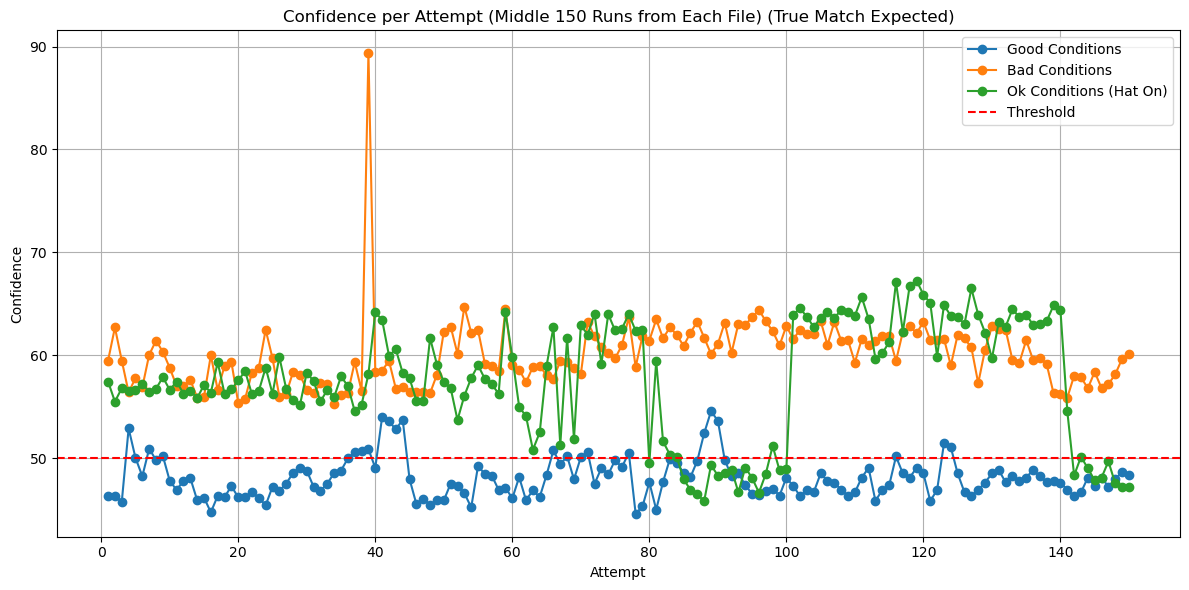

In [38]:
# Plot
plt.figure(figsize=(12, 6))
for label in combined_df['Source'].unique():
    subset = combined_df[combined_df['Source'] == label]
    plt.plot(subset['Run #'], subset['Confidence'], label=label, marker='o')

# Add threshold line
plt.axhline(y=50, color='red', linestyle='--', label='Threshold')

# Labels and legend
plt.xlabel("Attempt")
plt.ylabel("Confidence")
plt.title("Confidence per Attempt (Middle 150 Runs from Each File) (True Match Expected)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()